# Signal and Imaging Processing in Biomedical Applications

# Midterm Assignment - October 2017

# Question 3: ECG and ECG Signals

ECG is the process of recording the electrical activity of the heart over a period of time using electrodes placed on the skin.

In a conventional 12-lead ECG, ten electrodes are placed on the patient's limbs and on the surface of the chest.

These signals are brought to simple electrical circuits with amplifiers and analogue-digital converters.

The overall magnitude of the heart's electrical potential is measured from 12 different angles and is recorded over a period of time.

Noise is removed for the obtained signal.

Feature extraction of ECG signal is performed to determine the condition of the heart rate of the person.

General statistical testing is performed where the obtained signal is compared with the expected signal.

# Question 4:ECG signal sampled at 720Hz with 12-bit resolution


 The length of the time array is: 43081


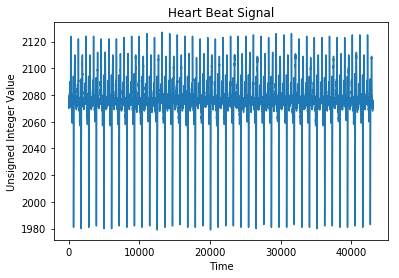

In [469]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook

%matplotlib inline

#now we import different packages that will allow to do math, linear algebra, numerical operations, array operations and plotting

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

#we use a simple open command for the file
a = open('aami3a.dat','rb')
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
Signal = np.fromfile(a,count=-1,dtype=np.uint16)
print('\n The length of the time array is: ' + str(len(Signal)) )

plt.plot(Signal)
plt.title("Heart Beat Signal")
plt.xlabel("Time")
plt.ylabel("Unsigned Integer Value")
a.close()



# Question 5: If a person at rest has an average heart rate between 60 and 100 beats per minute, how many samples should you plot to obtain 5 beats in the signal?

Let us consider 60 beats per minute, then the time taken for 5 beats is 5 seconds. 

We know that the signal sampling frequency is 720Hz for each signal.

Therefore we need 720 times 5 = 3600 samples to obtain 5 beats in the signal.

Now consider 100 beats per minute, then the time taken for 5 beats is 3 seconds.

Therefore we need 720 times 3 = 2160 samples to obtain 5 beats in the signal.

From the above calculation we can say that the number of samples vary between 2160 to 3600 samples.


# Question 6: Plot a zoom-in of the signal where 5 cardiac cycles can be observed considering this person has a cardiac cycle of 60 beats/minute.

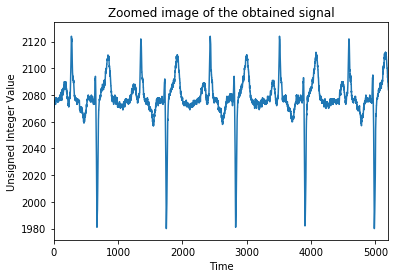

In [470]:
plt.xlim(0, 5200)
plt.plot(Signal)
plt.title("Zoomed image of the obtained signal")
plt.xlabel("Time")
plt.ylabel("Unsigned Integer Value")

# Question 7: Was the heart rate lower or higher for this individual?

From the given ECG signal, we can see that the heart rate is normal for this person.

# Question 8: Estimate the heart rate of this individual in beats/minute

From the given figure, we know that the figure repesents the normal heart rate of the person. The normal heart rate of the person is between 60 to 100 beats per minute. 

# Question 9: Obtain the DFT of the signal and plot the full spectrum

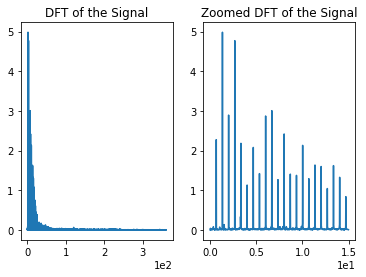

In [471]:

A = Signal[:43080]
#Here we obtain only the positive half of the signal
y = np.arange(21540)
#we need to eliminate any DC component in the signal
F_data = A-np.mean(A)
L = len(F_data)

#frequencies after performing fft will be between 0 and 1/2 of the actual sampling frequency
f=np.arange(0,720/2.,720/43080.)
Y=np.fft.fft(F_data)
#Here we are normalizing the positive frequencies
NoDc= abs(Y)/L

plt.subplot(121)
plt.plot(f,NoDc[:21540])
plt.title('DFT of the Signal')
plt.ticklabel_format(style='sci', axis ='x', scilimits=(0,0))

#zooming into just less than 15Hz
inx=np.where(f>15)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], NoDc[:inx[0]])
plt.title('Zoomed DFT of the Signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

p=np.amax(NoDc[:21540])


# Question 10: Obtain the frequency at which the maximum is observed


 Peak value of DFT is 4.98149090804
Maximum value is observed at f=1.393728223 Hz


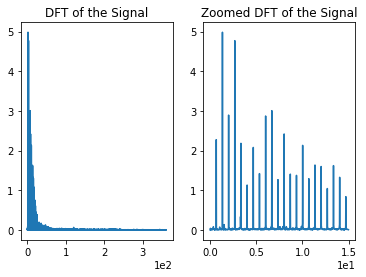

In [472]:
A = Signal[:43080]
#Here we obtain only the positive half of the signal
y = np.arange(21540)
#we need to eliminate any DC component in the signal
F_data = A-np.mean(A)
L = len(F_data)

#frequencies after performing fft will be between 0 and 1/2 of the actual sampling frequency
f=np.arange(0,720/2.,720/43080.)
Y=np.fft.fft(F_data)
#Here we are normalizing the positive frequencies
NoDc= abs(Y)/L

plt.subplot(121)
plt.plot(f,NoDc[:21540])
plt.title('DFT of the Signal',fontsize=12)
plt.ticklabel_format(style='sci', axis ='x', scilimits=(0,0))

#zooming into just less than 15Hz
inx=np.where(f>15)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], NoDc[:inx[0]])
plt.title('Zoomed DFT of the Signal',fontsize=12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

p=np.amax(NoDc[:21540])
print('\n Peak value of DFT is ' +str(p) )

for index in y:
    if NoDc[index]> 4.981:
        print ('Maximum value is observed at f=' +str(index/57.4) + ' Hz')
        break

# Question 11: From the spectrum, what is your calculation for the heart rate in beats/minute.

In [473]:
Hbeat=60/1.393728223
print("The Heart rate in beats per minute = " +str(Hbeat) +"bpm")


The Heart rate in beats per minute = 43.0499999999bpm


# Question 12: Discuss in the markdown the peaks observed in the spectrum and what information they provide, in particular explain how can you obtain from the frequency peaks the heart rate

The frequency analysis of any given signal can be obtained from its Discrete Fourier Transform(DFT) of the signal.

The peaks in the DFT of the signal is the harmonics of the heart beat and the smaller peaks are the noise elements.The noise elements can be eliminated using the Low Pass Filter (LPF)

From the above, we have obtained the peak value of DFT signal being at f=1.393Hz.

Therefore, the heart rate is 60/1.393 = 43.07 bpm.

Thus the detection of the peaks in DFT of the signal helps to find the approximate heart beat value.

# Question 13: Discuss in the markdown if you need to filter this signal, would it be a problem to affect the amplitude of the signal?

Low pass filters are used to filter ECG signal, the high frequency noise is eleminated in this process.

They attenuate only the amplitude of higher frequency ECG components.

Analog low pass filtering has a noticeable affect on the QRS complex, epsilon , and J-waves but do not alter repolarization signals.

# Question 14 and 15: Filter your signal using a digital low-pass Butterworth filter of order 4 that cuts frequencies above 100Hz. Provide a plot with the frequency response of the filter.

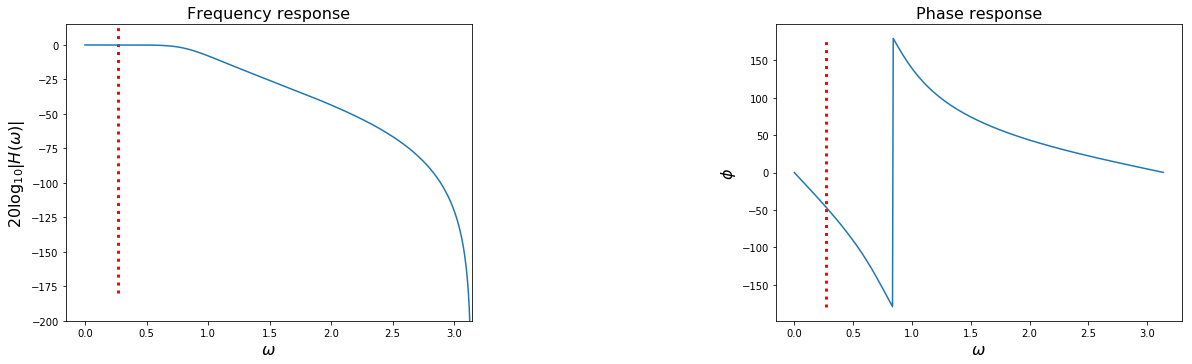

In [474]:
from __future__ import division
from matplotlib import gridspec
from scipy import signal
fig=plt.figure()
fig.set_size_inches((20,15))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.75, hspace=0.75)

fs=750 # given sampling frequency
NF=fs/2 # nyquist frequency
cutoff= 100 # cutoff frequency
Wn=100/NF
b,a=signal.butter(4,Wn,btype='low')
w,h=signal.freqz(b,a)
s=signal.lfilter(b,a,F_data) # output signal of the Butterworth filter

x=np.arange(0,43080/750.,1/750.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency response',fontsize=16)
ax.plot(w, 20 * np.log10(abs(h))) 
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=16)
ax.set_xlabel(r'$\omega$ ',fontsize=16)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-200,ymax=15)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)

ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Phase response',fontsize=16)
ax.set_xlabel(r'$\omega$',fontsize=16)
ax.set_ylabel(r"$\phi $ ",fontsize=16)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)

# Question 16: Obtain the DFT of the filtered signal and plot the full spectrum after filtering

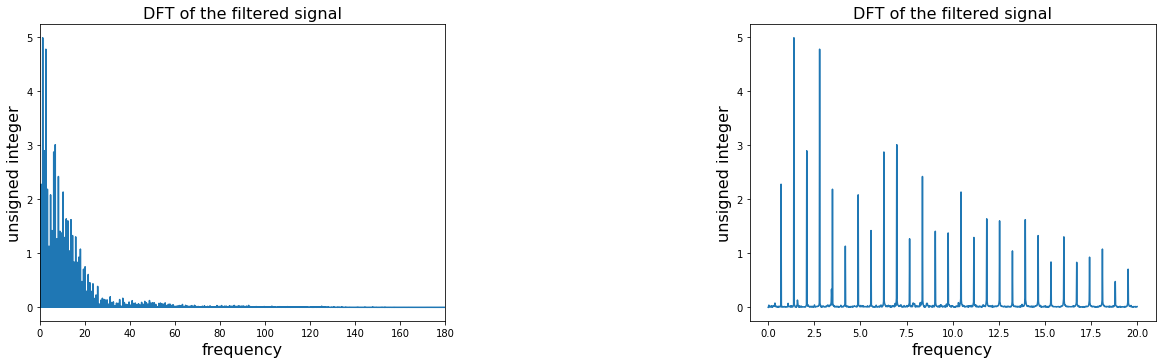

In [475]:
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((20,15))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.75, hspace=0.75)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
LL=len(s)
ff=np.arange(0,750,750/43080.)
YY=np.fft.fft(s)
Pyy=abs(YY)/LL
#Here we are Normalizing only the Positive Frequencies
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(ff, Pyy[:43080])
ax.set_title('DFT of the filtered signal',fontsize=16)
ax.set_xlabel('frequency',fontsize=16)
ax.set_ylabel('unsigned integer',fontsize=16)
ax.set_xlim(xmax = 180, xmin =0)
indx=np.where(ff>20)
indx=indx[0]
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(ff[:indx[0]], Pyy[:indx[0]])
ax.set_title('DFT of the filtered signal',fontsize=16)
ax.set_xlabel('frequency',fontsize=16)
ax.set_ylabel('unsigned integer',fontsize=16)

# Question 17: Discuss in the markdown the effects that your filter may have on any interpretation of the heart rate, did it affect it? Why? Why not? Explain.

Yes,The Butterworth filter effects the Heart rate,such that the frequency response becomes flatter and the transition band becomes sharper.

Butterworth filters are having a property of maximally flat frequency response and  no ripples in the pass band. 

It rolls of towards zero in the stop band.  It’s response slopes off linearly towards negative infinity on logarithmic Bode plot. 

Like other filter types which have non-monotonic ripple in the passband or stopband, these filters are having a monotonically changing magnitude function with ω.

# Bibliography

1 https://www.nayuki.io/page/how-to-implement-the-discrete-fourier-transform

2 Analysis of Butterworth and Chebyshev Filters for ECG Denoising Using Wavelets -http://iosrjournals.org/iosr-jece/papers/Vol6-Issue6/G0663744.pdf

3 http://www.ems12lead.com/2014/03/10/understanding-ecg-filtering/

4 https://dsp.stackexchange.com/questions/34127/higher-order-butterworth-filters

5 http://akuederle.com/matplotlib-zoomed-up-inset


    
    
 